In [1]:
%matplotlib inline

import sys

sys.path.append("..")

In [2]:
import torch

import matplotlib.pyplot as plt
import numpy as np

from hog.histogram import gradient, magnitude_orientation, hog, visualise_histogram

In [3]:
def octagon():
    return np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                     [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0],
                     [0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0],
                     [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0],
                     [0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0],
                     [0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
                     [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
                     [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
                     [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
                     [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
                     [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
                     [0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
                     [0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0],
                     [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0],
                     [0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0],
                     [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0],
                     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [4]:
img = octagon()
gx, gy = gradient(img, same_size=False)
mag, ori = magnitude_orientation(gx, gy)

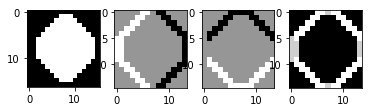

In [5]:
# Show gradient and magnitude
plt.figure()
plt.title('gradients and magnitude')
plt.subplot(141)
plt.imshow(img, cmap=plt.cm.Greys_r)
plt.subplot(142)
plt.imshow(gx, cmap=plt.cm.Greys_r)
plt.subplot(143)
plt.imshow(gy, cmap=plt.cm.Greys_r)
plt.subplot(144)
plt.imshow(mag, cmap=plt.cm.Greys_r)

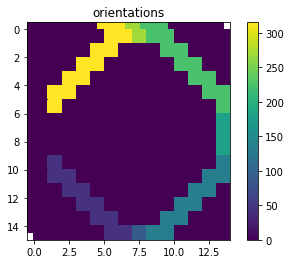

In [6]:
# Show the orientation deducted from gradient
plt.figure()
plt.title('orientations')
plt.imshow(ori)
plt.pcolor(ori)
plt.colorbar()

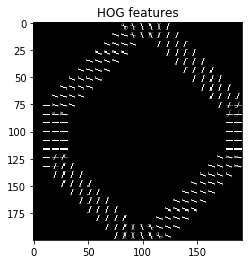

In [7]:
from scipy.ndimage.interpolation import zoom

# Plot histogram 
im = zoom(octagon(), 3) # make the image bigger to compute the histogram
h = hog(im, cell_size=(2, 2), cells_per_block=(1, 1), visualise=False, nbins=9, signed_orientation=False, normalise=True)
im2 = visualise_histogram(h, 8, 8, False)

plt.figure()
plt.title('HOG features')
plt.imshow(im2, cmap=plt.cm.Greys_r)

plt.show()

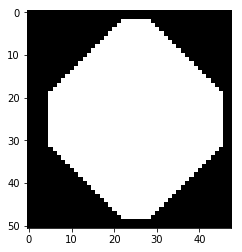

In [8]:
plt.imshow(im, cmap=plt.cm.Greys_r)

In [9]:
im.shape

(51, 48)

In [10]:
h.shape

(25, 24, 9)

# Dataset images

In [11]:
# Load the Dataset class

from settings import DATA_SOURCES
from src.datasets.sketchy import Sketchy

dataset = Sketchy(DATA_SOURCES['sketchy']['sketches'])
len(dataset)

75481

In [12]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import torchvision.utils as vutils

# Number of workers for dataloader
workers = 8

# Batch size for dataloader
batch_size = 1

# Number of GPUs available. Use 0 for CPU mode.
ngpu = 1

# Decide which device we want to run on
device = torch.device("cuda:0" if (torch.cuda.is_available() and ngpu > 0) else "cpu")

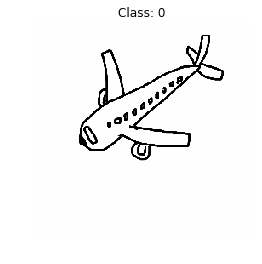

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import torchvision.utils as vutils

# Plot some training images
image = dataset[0]
plt.figure(figsize=(4,4))
plt.axis("off")
plt.title("Class: %s" % image[1])
plt.imshow(np.transpose(vutils.make_grid(image[0].to(device), padding=2, normalize=True).cpu(), (1,2,0)))

In [14]:
image[0].size()

torch.Size([3, 256, 256])

In [15]:
image[0][:,0:10,0:10].size()

torch.Size([3, 10, 10])

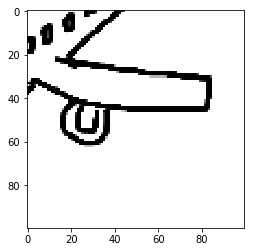

In [16]:
plt.imshow(np.transpose(vutils.make_grid(image[0][:,100:200,100:200].to(device), padding=2, normalize=True).cpu(), (1,2,0)))

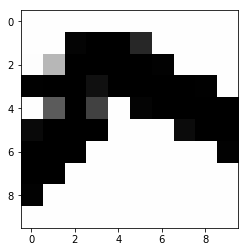

In [17]:
plt.imshow(np.transpose(vutils.make_grid(image[0][:,130:140,100:110].to(device), padding=2, normalize=True).cpu(), (1,2,0)))

In [18]:
image[0].numpy().shape

(3, 256, 256)

In [19]:
print(torch.all(torch.eq(image[0][0], image[0][1])))
print(torch.all(torch.eq(image[0][0], image[0][2])))
print(torch.all(torch.eq(image[0][1], image[0][2])))

tensor(1, dtype=torch.uint8)
tensor(1, dtype=torch.uint8)
tensor(1, dtype=torch.uint8)


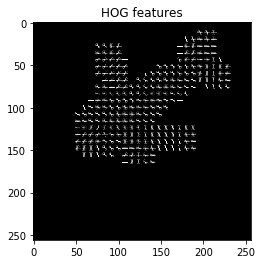

In [20]:
# Plot histogram 
from scipy.ndimage.interpolation import zoom
# make the image bigger to compute the histogram
im = image[0][0].numpy()
h = hog(im, cell_size=(8, 8), cells_per_block=(1, 1), visualise=False, nbins=9, signed_orientation=False, normalise=True)
im2 = visualise_histogram(h, 8, 8, False)

plt.figure()
plt.title('HOG features')
plt.imshow(im2, cmap=plt.cm.Greys_r)

plt.show()

In [21]:
from functools import reduce

print(h.shape)
descriptor = torch.from_numpy(h)
descriptor = descriptor.reshape(-1) # reshape to one-dimensional array of auto-determined length (in this case, the length will be the total ammount of elements in the array)
print(reduce(lambda x, y: x * y, h.shape, 1))
descriptor.size()

(32, 32, 9)
9216


torch.Size([9216])

In [22]:
def img_2_hog(image):
    im = image[0][0].numpy()
    h = hog(im, cell_size=(8, 8), cells_per_block=(1, 1), visualise=False, nbins=9, signed_orientation=False, normalise=True)
    return torch.from_numpy(h).reshape(-1)

In [ ]:
# Single threaded solution
from tqdm import tqdm_notebook as tqdm


vectors = [img_2_hog(image) for image in tqdm(dataset)]

In [ ]:
from tqdm import tqdm

from multiprocessing import cpu_count, Pool # multiprocessing package not suported on notebooks in windows :/
# https://stackoverflow.com/a/45787346

from asd import img_2_hog # workarround - doesnt work

try:
    cpus = cpu_count()
except NotImplementedError:
    cpus = 6   # arbitrary default
    

with Pool(processes=cpus) as pool:
    vectors = list(tqdm(pool.imap(img_2_hog, dataset), total=len(dataset)))

In [ ]:
# using p_tqdm, a wrapper over pathos (parallel computations across heterogenous resources) and tqdm - doesnt work either :/
from p_tqdm import p_map

vector = p_map(img_2_hog, dataset)

In [ ]:
import pickle


pickle.dump(vectors, open('sketchy_sketches_hog_vectors.pickle', 'wb'))

In [ ]:
import pickle


vectors = pickle.load(open('sketchy_sketches_hog_vectors.pickle', 'rb'))

In [ ]:
class HOG(object):
    def __init__(self, cell_size=(8, 8), cells_per_block=(1, 1), nbins=9, signed_orientation=False, normalise=True):
        self.cell_size = cell_size
        self.cells_per_block = cells_per_block
        self.nbins = nbins
        self.signed_orientation = signed_orientation
        self.normalise = normalise

    def __call__(self, sample):
        return img_2_hog(sample)

# Queries

In [ ]:
# dataset = Sketchy(DATA_SOURCES['sketchy']['sketches'], transforms+HOG)

In [ ]:
data_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=False, num_workers=workers)

In [ ]:
import numpy as np
import torchvision.utils as vutils

query = 0
image = dataset[query]
plt.figure(figsize=(6,6))
plt.axis("off")
plt.title("Query image - class %s" % image[1])
plt.imshow(np.transpose(vutils.make_grid(image[0].to(device)[:64], padding=2, normalize=True).cpu(),(1,2,0)))

In [ ]:
import torchvision.utils as vutils

from datetime import datetime
from sklearn.neighbors import NearestNeighbors

k = 16

start = datetime.now()

with torch.no_grad():
    results  = NearestNeighbors(n_neighbors=k, algorithm='brute', metric='cosine').fit(torch.stack(vectors).squeeze())

distances, indices = results.kneighbors(vectors[0].reshape(1,-1))

print('KNN search duration: %s' % (datetime.now() - start))

In [ ]:
indices

In [ ]:
print([dataset[i][1] for i in indices[0]])

top_k = torch.stack([dataset[i][0] for i in indices[0]])

plt.figure(figsize=(20,20))
plt.axis("off")
plt.title("Top %s" % k)
plt.imshow(np.transpose(vutils.make_grid(top_k.to(device)[:64], padding=2, normalize=True).cpu(),(1,2,0)))

# Canny

In [ ]:
import cv2
import numpy as np

In [ ]:
def CannyThreshold(lowThreshold):
    detected_edges = cv2.GaussianBlur(gray,(3,3),0)
    detected_edges = cv2.Canny(detected_edges,lowThreshold,lowThreshold*ratio,apertureSize = kernel_size)
    dst = cv2.bitwise_and(img,img,mask = detected_edges)  # just add some colours to edges from original image.
    cv2.imshow('canny demo',dst)

lowThreshold = 0
max_lowThreshold = 100
ratio = 3
kernel_size = 3

img = cv2.imread('n02691156_10168.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

cv2.namedWindow('canny demo')

cv2.createTrackbar('Min threshold','canny demo',lowThreshold, max_lowThreshold, CannyThreshold)

CannyThreshold(0)  # initialization
if cv2.waitKey(0) == 27:
    cv2.destroyAllWindows()